In [356]:
#libraries needed
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
# nltk.download('stopwords') #run once and comment it out to avoid it downloading multiple times
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI


porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings


In [357]:
df = pd.read_csv('dataset_twitter.csv',encoding='ISO-8859-1')
df.head()

,"ï»¿""conversation_id""",created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/14/screen_name,user_mentions/15/id_str,user_mentions/15/name,user_mentions/15/profile,user_mentions/15/screen_name,user_mentions/16/id_str,user_mentions/16/name,user_mentions/16/profile,user_mentions/16/screen_name,view_count
0,1621155929533337609,2023-02-02T14:37:47.000Z,6,Calling all accountants and bookkeepers lookin...,virtualfinance,Accounting,bookkeeping,ebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116129.0
1,1656947523213303810,2023-05-12T09:00:48.000Z,3,Our wonderful partners @LinfordGrey showing ho...,payroll,payments,accounting,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0
2,1654499440172883969,2023-05-05T14:53:00.000Z,0,RT @wolterskluweruk: We have a brilliant panel...,inclusion,equity,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0
3,1651865485732978689,2023-04-28T08:26:36.000Z,0,RT @LinfordGrey: We're a digital-first practic...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,886.0
4,1651154177748262913,2023-04-26T09:20:07.000Z,4,We're exhibiting at @Accountex London 2023! â­...,AccountexLondon,accounting,finance,payments,bookkeeping,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.0


**Data** **Wrangling**

**Data PreProcessing**

In [358]:
import nltk,collections
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
eng_stop_words = list(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /Users/Amara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Amara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Amara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [359]:
emoji = list(UNICODE_EMOJI.keys())


In [360]:
# function for preprocessing tweet in preparation for sentiment analysis
def ProcessedTweets(text):
    #changing tweet text to small letters
    text = text.lower()
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    
    clean_str = ''.join([c for c in text if ord(c) < 128])
    return clean_str

In [361]:
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
df['Processed_Tweets'] = df['full_text'].apply(ProcessedTweets)



**Sentiment Analysis**

In [363]:
# Function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive" 

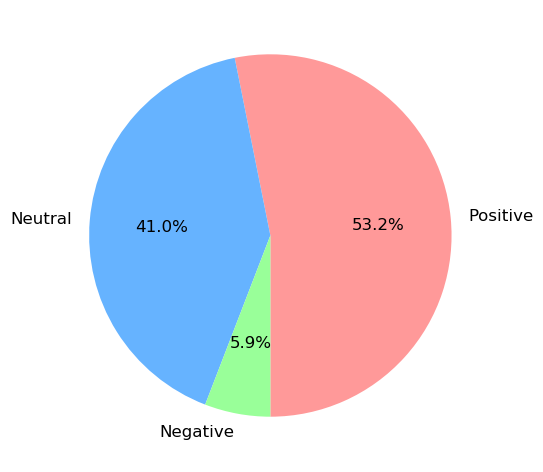

In [364]:
# using the functions to get the polarity and sentiment

df['Polarity'] = df['Processed_Tweets'].apply(polarity)
df['Subjectivity'] = df['Processed_Tweets'].apply(subjectivity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)

sent = df['Sentiment'].value_counts()

#add colors
colors = ['#ff9999','#66b3ff','#99ff99']

#plot pie chart

fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sent.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="", colors=colors)



In [365]:


df['Processed_Tweets2'] = df['full_text'].apply(ProcessedTweets2)

def color_survived(val):
        color = '#ff9999' if val=="Positive" else '#99ff99' if val=="Negative" else '#66b3ff'
        return f'background-color: {color}'
dff = df[['Sentiment','full_text']]
dff.rename(columns = {'full_text':'Tweets'}, inplace = True)
dff =dff[:10]
dff = dff.style.applymap(color_survived, subset=['Sentiment'])
dff.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Sentiment,Tweets
0,Positive,Calling all accountants and bookkeepers looking to delight clients ð£ Get your ultimate guide to rolling out a virtual finance service your clients will love! â¤ï¸ Download your free copy here ð https://t.co/KMMnvdFrsu #virtualfinance #Accounting #bookkeeping #ebook https://t.co/shN9RNWva9
1,Positive,Our wonderful partners @LinfordGrey showing how easy it is to pay employees with @telleroo ð Thank you Laila! ð #payroll #payments #accounting
2,Positive,RT @wolterskluweruk: We have a brilliant panel covering #inclusion and #equity at next week's @Accountex! Our own Elise Sallis takes to tâ¦
3,Neutral,"RT @LinfordGrey: We're a digital-first practice, what does that look like? Like this. We've mapped out our tech-stack. @Xero @karbonhq @ignâ¦"
4,Positive,We're exhibiting at @Accountex London 2023! â­ï¸ Book your free ticket today and meet the @telleroo team face-to-face on stand 774 on the 10-11 May at ExCeL London https://t.co/iS0o82Zida #AccountexLondon #accounting #finance #payments #bookkeeping https://t.co/UNVgUHqpnZ
5,Neutral,Find out how @SAS_Accountants have transformed #payroll for their clients with @telleroo ð
6,Positive,Good luck to everyone nominated for a #XeroAward tonight ð Great to see so many familiar faces at the #Iwocaroo pre-drinks! ð¥³ð¥ https://t.co/aDr3dhhZgr
7,Neutral,@northernacc @ShowAccountancy @evolutionlondon @NordensAccounts Dream team! ð¥³
8,Positive,"Find out how award-winning firm @LinfordGrey saved their client 4 hours a week (ð¤¯) with @telleroo and @Xero, that's 2 full working days a month! #Automation #SME #Accounting #XeroApps #payments"
9,Positive,RT @chaser_hq: Tick-tock! â° Just 2 days till The great debate ð¥ Experts from @telleroo @fathomhq @agencynomics and @cactus will battle itâ¦


In [366]:
X = df['Processed_Tweets'].values
y = df['Sentiment'].values

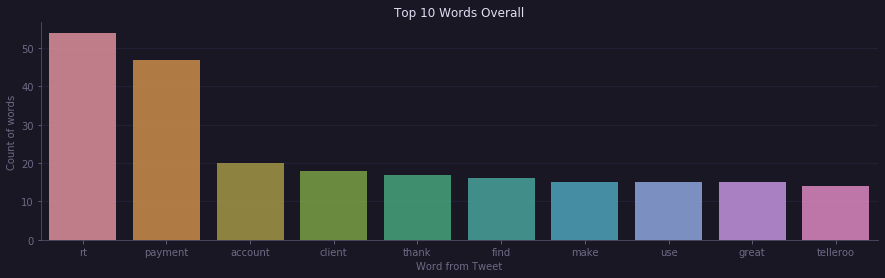

In [370]:
#break each tweet sentence into words
from nltk.stem.snowball import SnowballStemmer


sentences = []

for word in X:
    sentences.append(word)
sentences
lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10] #shows first 10 words in the first tweet

#stemming all the words to their root word
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    if word not in eng_stop_words:
        stem2.append(word)
#creates a new dataframe for the stem and shows the count of the most used words
data = pd.DataFrame(stem2)
data=data[0].value_counts()

#plots the top 20 used words
data = data[:10]
with plt.style.context("rose-pine.mplstyle"):
    #data = data.nlargest(columns="Count", n = 10) 
    plt.figure(figsize=(15,4))
    ax = sns.barplot(x=data.index,y=data.values, alpha=0.8)
    ax.set(xlabel = 'Word from Tweet')
    ax.set(ylabel = 'Count of words')
    plt.title('Top 10 Words Overall')
    plt.show()
  
    
    

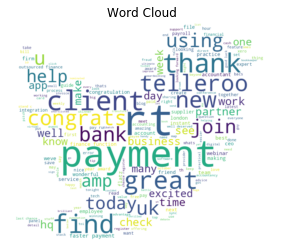

In [372]:
from PIL import Image

cloud_image='mask/twitter_mask.png'

mask = np.array(Image.open(cloud_image))

#tweets_string = " ".join(cat.split()[1] for cat in df.text)
tweets_string = pd.Series(X).str.cat(sep=' ')
stopwords = set(STOPWORDS)

w_cloud = WordCloud(width = 7000, height = 5000,
                background_color ='white',
                stopwords = stopwords,
                mask = mask).generate(tweets_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')
plt.show()

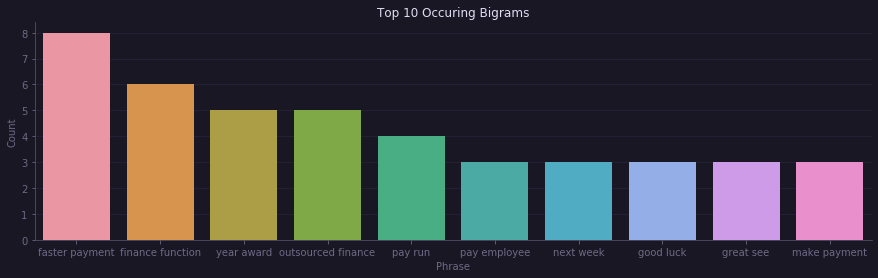

In [369]:
#tokenization
from nltk.util import ngrams 
import functools

tokenized_tweet = df['Processed_Tweets'].apply(lambda x: list(ngrams(x.split(), 2)))

l = functools.reduce(lambda x, y: list(x)+list(y), zip(tokenized_tweet))

flatten = [item for sublist in l for item in sublist]
counts = collections.Counter(flatten).most_common()
df2 = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df2['Phrase']= df2['Phrase'].apply(lambda x: ' '.join([w for w in x]))

with plt.style.context("rose-pine.mplstyle"):
    df2 = df2.nlargest(columns="Count", n = 10) 
    plt.figure(figsize=(15,4))
    ax = sns.barplot(data=df2, x= "Phrase", y = "Count")
    ax.set(ylabel = 'Count')
    plt.title('Top 10 Occuring Bigrams')
    plt.show()